# Model Building

In [1]:
import pandas as pd
resume_data = pd.read_excel('cleaned_resume.xlsx')
resume_data.shape

(79, 3)

In [3]:
resume_data.head()

,Extracted_Name,Category,Raw_Details
0,Anubhavsingh,PeopleSoft Resumes,anubhav kumar singh core competencies scriptin...
1,G Ananda Rayudu,PeopleSoft Resumes,g ananda rayudu httpswwwlinkedincominanandguda...
2,Gangareddy,PeopleSoft Resumes,peoplesoft database administrator gangareddy p...
3,Murali,PeopleSoft Resumes,classification internal classification interna...
4,Priyanka Ramadoss,PeopleSoft Resumes,priyanka ramadoss mountpleasant coonoor the ni...


# Train-Test Split

In [5]:
x = resume_data['Raw_Details'].values
y = resume_data['Category'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,  random_state = 42)

In [9]:
x_train.shape

(63,)

In [11]:
x_test.shape

(16,)

# TF-IDF Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer(max_features = 5000)
vectorizer

TfidfVectorizer(max_features=5000)

In [15]:
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [17]:
x_train_tfidf.shape

(63, 4361)

In [19]:
x_test_tfidf.shape

(16, 4361)

# Label Encoding

In [21]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [23]:
y_train_encoded = label_encoder.fit_transform(y_train)  
y_test_encoded = label_encoder.transform(y_test)

In [25]:
y_train_encoded.shape

(63,)

In [27]:
y_test_encoded.shape

(16,)

# 1. Logistic Regression Classifier

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

logistic_model = LogisticRegression(random_state=42, max_iter=500)

logistic_model.fit(x_train_tfidf, y_train_encoded)

y_train_pred = logistic_model.predict(x_train_tfidf)
y_test_pred = logistic_model.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
classification_rep = classification_report(y_test_encoded, y_test_pred)

cv_scores = cross_val_score(logistic_model, x_train_tfidf, y_train_encoded, cv=5)
mean_cv_accuracy = cv_scores.mean()

print("Logistic Regression Metrics:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")

Logistic Regression Metrics:
Train Accuracy: 1.0
Test Accuracy: 0.9375
Precision: 0.9464285714285714
Recall: 0.9375
F1 Score: 0.9364316239316239
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.95      0.95        16
weighted avg       0.95      0.94      0.94        16

Cross-Validation Scores: [1.         0.92307692 1.         0.91666667 1.        ]
Mean CV Accuracy: 0.9679487179487178


## 2. Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(x_train_tfidf, y_train_encoded)

y_train_pred = decision_tree_model.predict(x_train_tfidf)
y_test_pred = decision_tree_model.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
classification_rep = classification_report(y_test_encoded, y_test_pred)

cv_scores = cross_val_score(decision_tree_model, x_train_tfidf, y_train_encoded, cv=5)
mean_cv_accuracy = cv_scores.mean()

print("Decision Tree Metrics:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")

Decision Tree Metrics:
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Cross-Validation Scores: [1.         0.92307692 0.84615385 0.83333333 1.        ]
Mean CV Accuracy: 0.9205128205128205


# 3. SVM Classifier

In [33]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

svm_model.fit(x_train_tfidf, y_train_encoded)

y_train_pred = svm_model.predict(x_train_tfidf)
y_test_pred = svm_model.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
classification_rep = classification_report(y_test_encoded, y_test_pred)

cv_scores = cross_val_score(svm_model, x_train_tfidf, y_train_encoded, cv=5)
mean_cv_accuracy = cv_scores.mean()

print("SVM Metrics:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")

SVM Metrics:
Train Accuracy: 1.0
Test Accuracy: 0.9375
Precision: 0.9464285714285714
Recall: 0.9375
F1 Score: 0.9364316239316239
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.95      0.95        16
weighted avg       0.95      0.94      0.94        16

Cross-Validation Scores: [1.         0.92307692 1.         0.91666667 1.        ]
Mean CV Accuracy: 0.9679487179487178


# 4. KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train_tfidf, y_train_encoded)

y_train_pred = knn_model.predict(x_train_tfidf)
y_test_pred = knn_model.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
classification_rep = classification_report(y_test_encoded, y_test_pred)

cv_scores = cross_val_score(knn_model, x_train_tfidf, y_train_encoded, cv=5)
mean_cv_accuracy = cv_scores.mean()

print("KNN Metrics:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")

KNN Metrics:
Train Accuracy: 0.9841269841269841
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Cross-Validation Scores: [1.         1.         0.92307692 0.91666667 0.83333333]
Mean CV Accuracy: 0.9346153846153846


# 5. Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(x_train_tfidf, y_train_encoded)

y_train_pred = nb_model.predict(x_train_tfidf)
y_test_pred = nb_model.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
classification_rep = classification_report(y_test_encoded, y_test_pred)

cv_scores = cross_val_score(nb_model, x_train_tfidf, y_train_encoded, cv=5)
mean_cv_accuracy = cv_scores.mean()

print("Naive Bayes Metrics:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")

Naive Bayes Metrics:
Train Accuracy: 1.0
Test Accuracy: 0.8125
Precision: 0.78125
Recall: 0.8125
F1 Score: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         2
           3       0.50      1.00      0.67         3

    accuracy                           0.81        16
   macro avg       0.62      0.70      0.64        16
weighted avg       0.78      0.81      0.78        16

Cross-Validation Scores: [0.92307692 0.84615385 1.         0.75       0.75      ]
Mean CV Accuracy: 0.8538461538461538


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulag\anaconda3\Lib\site-packag

# 6. Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train_tfidf, y_train_encoded)

y_train_pred = rf_model.predict(x_train_tfidf)
y_test_pred = rf_model.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
classification_rep = classification_report(y_test_encoded, y_test_pred)

cv_scores = cross_val_score(rf_model, x_train_tfidf, y_train_encoded, cv=5)
mean_cv_accuracy = cv_scores.mean()

print("Random Forest Metrics:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")

Random Forest Metrics:
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Cross-Validation Scores: [0.92307692 0.92307692 1.         0.91666667 1.        ]
Mean CV Accuracy: 0.9525641025641025


# 7. Bagging Classifier

In [41]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(random_state=42)

bagging_model.fit(x_train_tfidf, y_train_encoded)

y_train_pred = bagging_model.predict(x_train_tfidf)
y_test_pred = bagging_model.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
classification_rep = classification_report(y_test_encoded, y_test_pred)

cv_scores = cross_val_score(bagging_model, x_train_tfidf, y_train_encoded, cv=5)
mean_cv_accuracy = cv_scores.mean()

print("Bagging Classifier Metrics:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")

Bagging Classifier Metrics:
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Cross-Validation Scores: [0.92307692 0.92307692 1.         0.91666667 1.        ]
Mean CV Accuracy: 0.9525641025641025


# 8. Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(x_train_tfidf, y_train_encoded)

y_train_pred = gb_model.predict(x_train_tfidf)
y_test_pred = gb_model.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
classification_rep = classification_report(y_test_encoded, y_test_pred)

cv_scores = cross_val_score(gb_model, x_train_tfidf, y_train_encoded, cv=5)
mean_cv_accuracy = cv_scores.mean()

print("Gradient Boosting Metrics:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")

Gradient Boosting Metrics:
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Cross-Validation Scores: [0.92307692 1.         1.         0.91666667 1.        ]
Mean CV Accuracy: 0.9679487179487178


# 9. AdaBoost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(random_state=42)

adaboost_model.fit(x_train_tfidf, y_train_encoded)

y_train_pred = adaboost_model.predict(x_train_tfidf)
y_test_pred = adaboost_model.predict(x_test_tfidf)

train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
classification_rep = classification_report(y_test_encoded, y_test_pred)

cv_scores = cross_val_score(adaboost_model, x_train_tfidf, y_train_encoded, cv=5)
mean_cv_accuracy = cv_scores.mean()

print("AdaBoost Metrics:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {mean_cv_accuracy}")

C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulag\anaconda3\Lib\site-packag

AdaBoost Metrics:
Train Accuracy: 0.42857142857142855
Test Accuracy: 0.4375
Precision: 0.3352272727272727
Recall: 0.4375
F1 Score: 0.35096153846153844
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         6
           2       0.18      1.00      0.31         2
           3       0.00      0.00      0.00         3

    accuracy                           0.44        16
   macro avg       0.30      0.50      0.33        16
weighted avg       0.34      0.44      0.35        16

Cross-Validation Scores: [0.38461538 0.38461538 0.38461538 0.5        0.5       ]
Mean CV Accuracy: 0.43076923076923085


In [47]:
import pandas as pd
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression Classifier": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "SVM Classifier": SVC(),
    "KNN Classifier": KNeighborsClassifier(),
    "Naive Bayes Classifier": MultinomialNB(),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
}

results = []

for model_name, model in models.items():
    # Train the model
    model.fit(x_train_tfidf, y_train_encoded)
    
    y_train_pred = model.predict(x_train_tfidf)
    y_test_pred = model.predict(x_test_tfidf)
    
    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
    precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
    recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
    f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
    
    cv_scores = cross_val_score(model, x_train_tfidf, y_train_encoded, cv=5)
    mean_cv_accuracy = cv_scores.mean()
    
    results.append({
        "Models": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Mean CV Accuracy": mean_cv_accuracy
    })

results_df = pd.DataFrame(results)
results_df

C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Models,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Mean CV Accuracy
0,Logistic Regression Classifier,1.000000,0.9375,0.946429,0.9375,0.936432,0.967949
1,Decision Tree Classifier,1.000000,1.0000,1.000000,1.0000,1.000000,0.952564
2,SVM Classifier,1.000000,0.9375,0.946429,0.9375,0.936432,0.967949
3,KNN Classifier,0.984127,1.0000,1.000000,1.0000,1.000000,0.934615
4,Naive Bayes Classifier,1.000000,0.8125,0.781250,0.8125,0.777778,0.853846
5,Random Forest Classifier,1.000000,1.0000,1.000000,1.0000,1.000000,0.952564
6,Bagging Classifier,1.000000,1.0000,1.000000,1.0000,1.000000,0.952564
7,Gradient Boosting Classifier,1.000000,1.0000,1.000000,1.0000,1.000000,0.967949
8,AdaBoost Classifier,0.428571,0.4375,0.335227,0.4375,0.350962,0.430769


# Evaluation Metrics Visualization

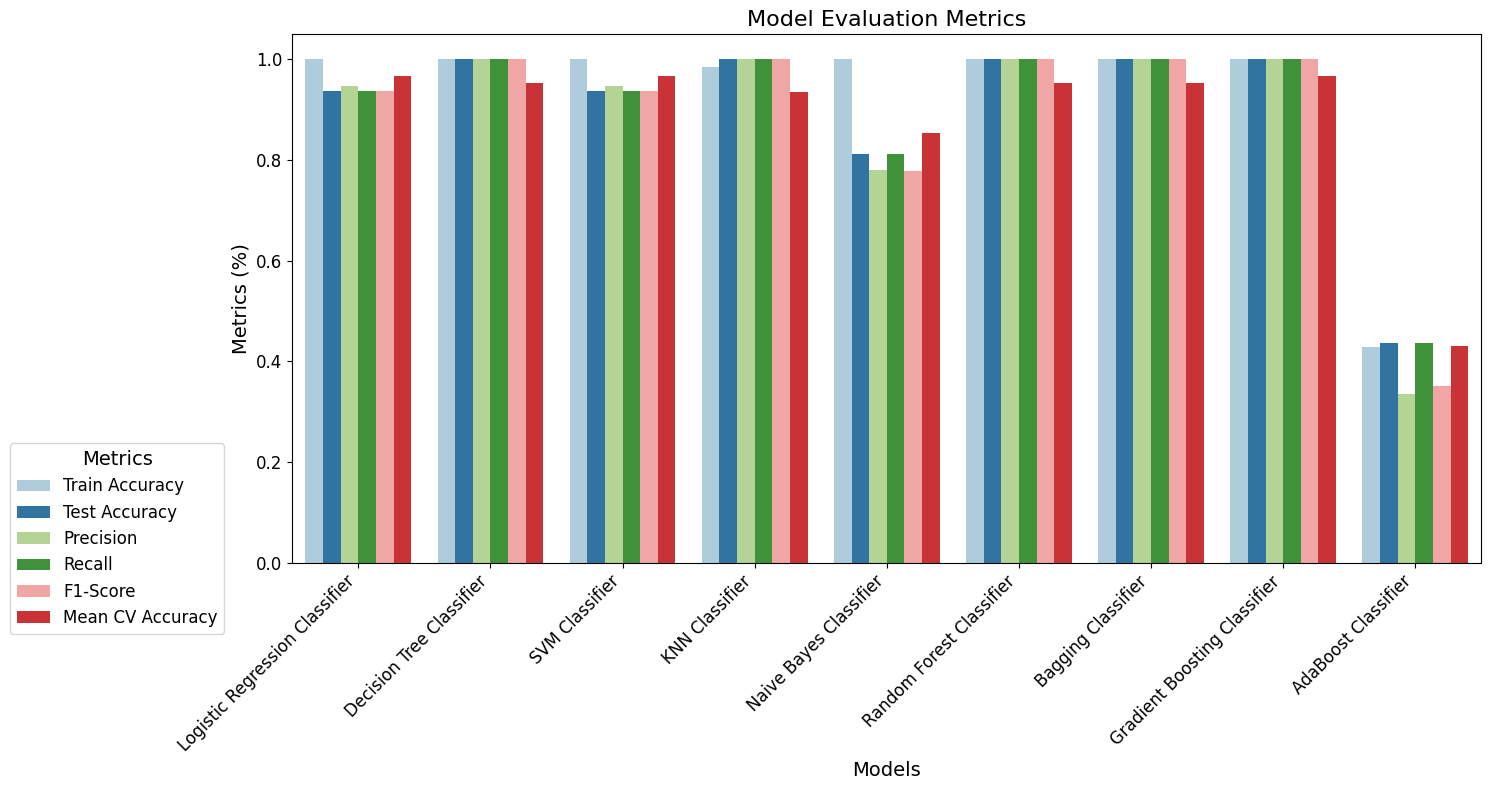

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

evaluation_values = results_df.melt(
    id_vars = 'Models', 
    value_vars = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'Mean CV Accuracy'],
    var_name = 'Metrics',
    value_name = 'Value'
)
    
plt.figure(figsize = (15,8))
sns.barplot(x = 'Models', y = 'Value', hue = 'Metrics', data = evaluation_values, palette = 'Paired')
plt.title('Model Evaluation Metrics', fontsize = 16)
plt.xlabel('Models', fontsize = 14)
plt.ylabel('Metrics (%)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Metrics', fontsize = 12, title_fontsize = 14, loc = 'lower right', bbox_to_anchor = (-0.05, -0.15), frameon = True)
plt.tight_layout()
plt.show()

# Train Vs Test Accuracies

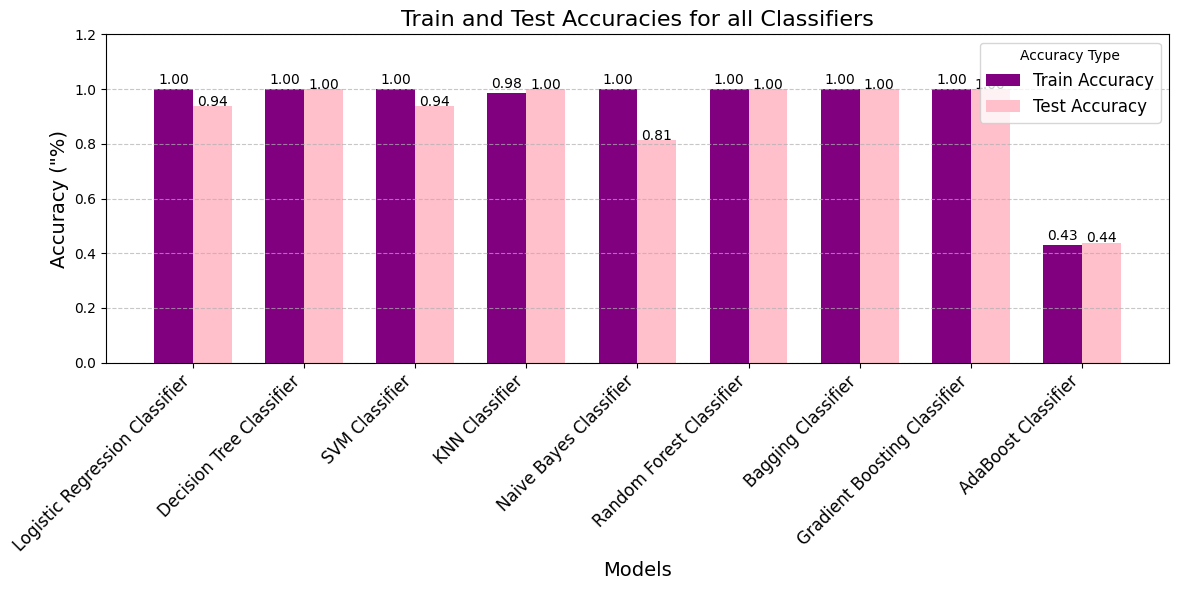

In [51]:
plt.figure(figsize = (12,6))

x = results_df['Models']
train_acc = results_df['Train Accuracy']
test_acc = results_df['Test Accuracy']

bar_width = 0.35
x_pos = range(len(x))

bars1 = plt.bar(x_pos, train_acc, width = bar_width, label = 'Train Accuracy', color = 'purple')
bars2 = plt.bar([p + bar_width for p in x_pos], test_acc, width = bar_width, label = 'Test Accuracy', color = 'pink')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{bar.get_height():.2f}', ha = 'center', fontsize = 10, color = 'black')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.002, f'{bar.get_height():.2f}', ha = 'center', fontsize = 10, color = 'black')

plt.title('Train and Test Accuracies for all Classifiers', fontsize = 16)
plt.xlabel('Models', fontsize = 14)
plt.ylabel('Accuracy ("%)', fontsize = 14)
plt.xticks([p + bar_width / 2 for p in x_pos], x, rotation = 45, ha = 'right', fontsize = 12)
plt.legend(fontsize = 12, title = 'Accuracy Type')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.ylim(0, max(max(train_acc), max(test_acc)) * 1.2)
plt.tight_layout()
plt.show()

# Model Deployment

In [53]:
import joblib

joblib.dump(decision_tree_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [55]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']